In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness, Rescaling, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
tf.__version__

'2.19.0'

In [2]:
SEED = 42
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32

In [3]:
train_dataset = image_dataset_from_directory(
    "dogandcat/training_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="training",
    seed=SEED
)
val_dataset = image_dataset_from_directory(
    "dogandcat/training_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="validation",
    seed=SEED
)
test_dataset = image_dataset_from_directory(
    "dogandcat/test_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

Found 8005 files belonging to 2 classes.
Using 6004 files for training.
Found 8005 files belonging to 2 classes.
Using 2001 files for validation.
Found 2023 files belonging to 2 classes.


In [4]:
class_names = train_dataset.class_names
print(f"Classes: {class_names}")

Classes: ['cats', 'dogs']


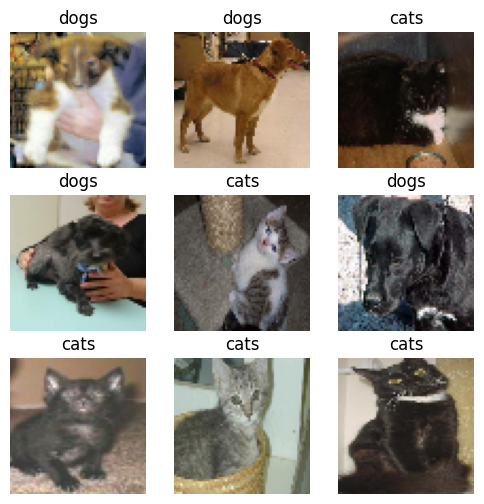

In [5]:
plt.figure(figsize=(6, 6))

for images, labels in train_dataset.take(2):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [6]:
model = Sequential([
    Input(shape=(64, 64, 3)),

    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
    RandomBrightness(0.2),

    Rescaling(1./255),

    Conv2D(filters = 16, kernel_size=(3,3), activation="relu", padding = 'same'),
    Conv2D(filters = 16, kernel_size=(3,3), activation="relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2)),

    Conv2D(filters = 32, kernel_size=(3,3), activation="relu", padding = 'same'),
    Conv2D(filters = 32, kernel_size=(3,3), activation="relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2)),

    Conv2D(filters = 64, kernel_size=(3,3), activation="relu", padding = 'same'),
    Conv2D(filters = 64, kernel_size=(3,3), activation="relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2)),

    Conv2D(filters = 128, kernel_size=(3,3), activation="relu", padding = 'same'),
    Conv2D(filters = 128, kernel_size=(3,3), activation="relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2)),

    Dropout(.3),

    Conv2D(filters = 256, kernel_size=(3,3), activation="relu", padding = 'same'),
    Conv2D(filters = 256, kernel_size=(3,3), activation="relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2)),
    Dropout(.3),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(.5),
    Dense(1, activation='sigmoid'),

])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 64, 64, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness               │ (None, 64, 64, 3)      │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,704,081 (6.50 MB)

 Trainable params: 1,704,081 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
loss = 'binary_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001,beta_1=0.9, beta_2=0.999,epsilon=1e-07)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
      

history = model.fit(x = train_dataset, validation_data=val_dataset, epochs=21, callbacks=[early_stopping])

Epoch 1/21
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.5024 - loss: 0.6932 - val_accuracy: 0.5532 - val_loss: 0.6925
Epoch 2/21
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.5317 - loss: 0.6914 - val_accuracy: 0.6232 - val_loss: 0.6807
Epoch 3/21
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5791 - loss: 0.6759 - val_accuracy: 0.6137 - val_loss: 0.6694
Epoch 4/21
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5940 - loss: 0.6666 - val_accuracy: 0.6167 - val_loss: 0.6616
Epoch 5/21
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.6065 - loss: 0.6650 - val_accuracy: 0.6132 - val_loss: 0.6701
Epoch 6/21
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6169 - loss: 0.6558 - val_accuracy: 0.5782 - val_loss: 0.7300
Epoch 7/21
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6417 - loss: 0.6322 - val_accuracy: 0.6007 - val_loss: 0.6546
Epoch 8/21
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6537 - loss: 0.6172 - val_acc

In [11]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Validaiton Accuracy: {accuracy:.4f}")
loss, accuracy = model.evaluate(train_dataset)
print(f"Train Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7772 - loss: 0.4697
Validaiton Accuracy: 0.7736
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7835 - loss: 0.4495
Train Accuracy: 0.7865


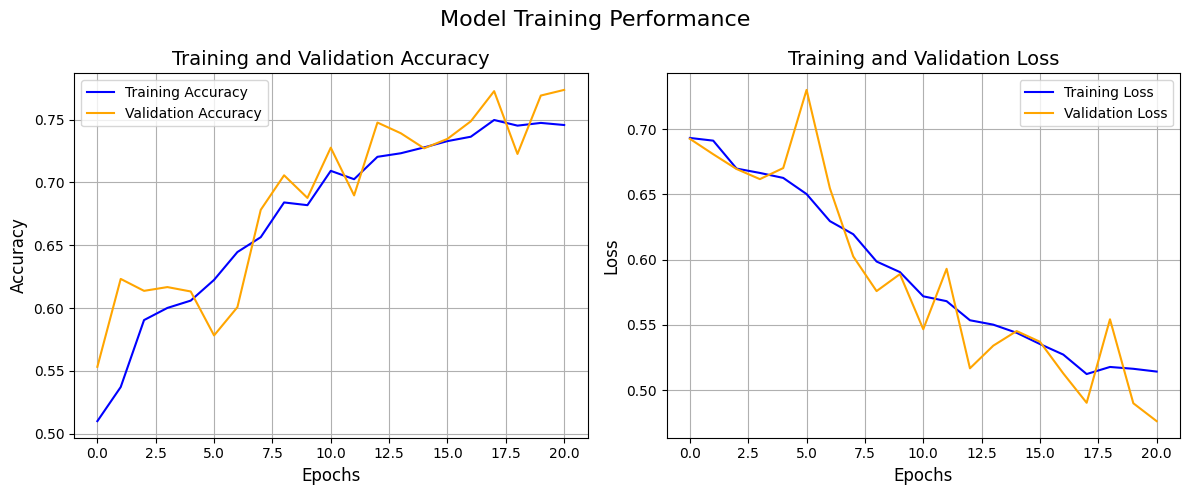

In [12]:
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7730 - loss: 0.4779
Test Accuracy: 0.7687


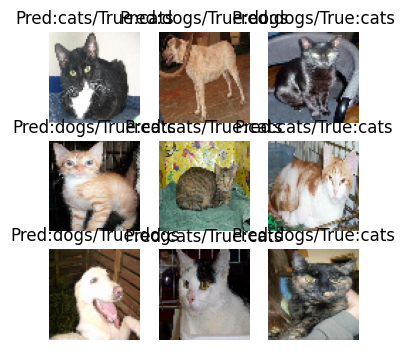

In [18]:
from tensorflow.keras.preprocessing import image

plt.figure(figsize=(4, 4))

for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # prepocess photo
        img_x = tf.expand_dims(images[i], axis=0)  
        
        # predict
        result = model.predict(img_x, verbose=False)
        prediction = class_names[0 if result[0][0] < 0.5 else 1]
        
        plt.title(f"Pred:{prediction}/True:{class_names[labels[i]]}")
        plt.axis("off")

plt.show()